In [1]:
# libraries for numerical
import pandas as pd  
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt  
import seaborn as sns

In [109]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [110]:
train_data.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


In [111]:
test_data.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,female,group C,some college,standard,none,67,72
1,1,male,group E,some college,standard,none,60,59
2,2,female,group C,bachelor's degree,standard,none,93,95
3,3,male,group D,associate's degree,standard,none,48,46
4,4,female,group B,associate's degree,standard,none,76,80


In [112]:
train_data.drop('Unnamed: 0', axis=1, inplace=True)
train_data.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,male,group C,some college,standard,none,61,62,61
1,female,group C,associate's degree,standard,none,62,53,53
2,female,group C,some college,free/reduced,completed,75,70,67
3,male,group C,some high school,free/reduced,none,76,65,79
4,male,group A,high school,free/reduced,none,58,44,53


In [113]:
test_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group C,some college,standard,none,67,72
1,male,group E,some college,standard,none,60,59
2,female,group C,bachelor's degree,standard,none,93,95
3,male,group D,associate's degree,standard,none,48,46
4,female,group B,associate's degree,standard,none,76,80


# Exploratory Data Analysis (EDA) with Categorical Variables

In [114]:
train_data.isnull().sum()

gender                         0
ethnicity                      0
parental level of education    0
lunch                          0
test preparation course        0
reading score                  0
writing score                  0
math score                     0
dtype: int64

In [115]:
### Work with gender column
train_data['gender'].value_counts()

female    367
male      333
Name: gender, dtype: int64

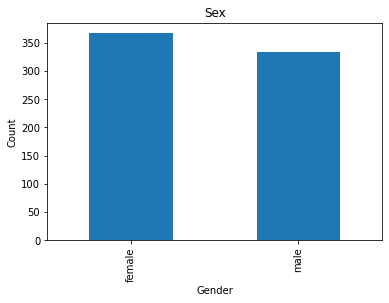

In [116]:
### Display the gender details in the Graph
train_data.gender.value_counts().plot(kind='bar')
plt.title('Sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [117]:
gender_score = train_data.groupby('gender')['math score'].value_counts()
gender_score

gender  math score
female  65            22
        69            13
        74            13
        62            12
        63            12
                      ..
male    35             1
        37             1
        41             1
        43             1
        99             1
Name: math score, Length: 137, dtype: int64

In [118]:
### Work with ethnicity column
train_data['ethnicity'].value_counts()

group C    219
group D    184
group B    141
group E     98
group A     58
Name: ethnicity, dtype: int64

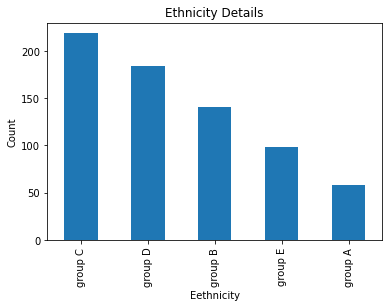

In [119]:
### Display the ethnicity details in the Graph
train_data.ethnicity.value_counts().plot(kind='bar')
plt.title('Ethnicity Details')
plt.xlabel('Eethnicity')
plt.ylabel('Count')
plt.show()

In [120]:
ethnicity_score = train_data.groupby('ethnicity')['math score'].value_counts()
ethnicity_score

ethnicity  math score
group A    53            3
           71            3
           44            2
           45            2
           47            2
                        ..
group E    82            1
           85            1
           88            1
           89            1
           91            1
Name: math score, Length: 257, dtype: int64

In [121]:
### Work with parental level of education column
train_data['parental level of education'].value_counts()

some college          175
associate's degree    138
high school           134
some high school      129
bachelor's degree      81
master's degree        43
Name: parental level of education, dtype: int64

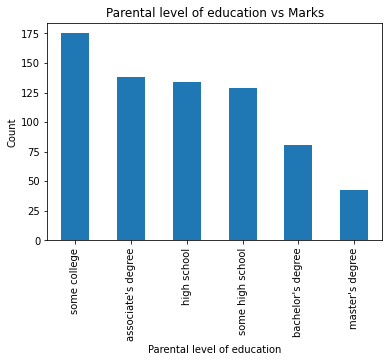

In [122]:
### Display the ethnicity details in the Graph
train_data['parental level of education'].value_counts().plot(kind='bar')
plt.title('Parental level of education vs Marks')
plt.xlabel('Parental level of education')
plt.ylabel('Count')
plt.show()

In [123]:
### Work with Lunch column
train_data['lunch'].value_counts()

standard        454
free/reduced    246
Name: lunch, dtype: int64

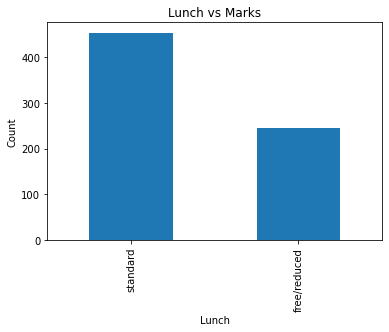

In [124]:
### Display the Lunch details in the Graph
train_data['lunch'].value_counts().plot(kind='bar')
plt.title('Lunch vs Marks')
plt.xlabel('Lunch')
plt.ylabel('Count')
plt.show()

In [125]:
### Work with Lunch column
train_data['test preparation course'].value_counts()

none         456
completed    244
Name: test preparation course, dtype: int64

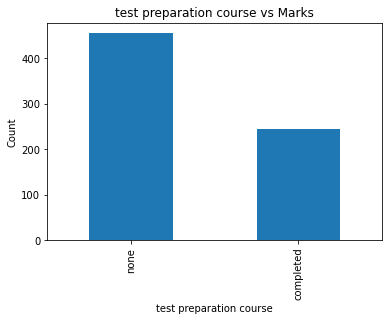

In [126]:
### Display the Lunch details in the Graph
train_data['test preparation course'].value_counts().plot(kind='bar')
plt.title('test preparation course vs Marks')
plt.xlabel('test preparation course')
plt.ylabel('Count')
plt.show()

### Apply LabelEncoder

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       700 non-null    object
 1   ethnicity                    700 non-null    object
 2   parental level of education  700 non-null    object
 3   lunch                        700 non-null    object
 4   test preparation course      700 non-null    object
 5   reading score                700 non-null    int64 
 6   writing score                700 non-null    int64 
 7   math score                   700 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 43.9+ KB


In [67]:
## Drop the unwanted features
train_data.drop(['gender', 'ethnicity','lunch', 'writing score', 'reading score'], axis=1, inplace=True)
test_data.drop(['gender', 'ethnicity','lunch', 'writing score', 'reading score'], axis=1, inplace=True)

In [89]:
le = LabelEncoder()

### Apply label encoding on Gender Column
train_data['gender']= le.fit_transform(train_data['gender'])
test_data['gender']= le.fit_transform(test_data['gender'])

### Apply label encoding on Ethinicity Column
train_data['ethnicity']= le.fit_transform(train_data['ethnicity'])
test_data['ethnicity']= le.fit_transform(test_data['ethnicity'])

### Apply label encoding on parental level of education Column
train_data['parental level of education']= le.fit_transform(train_data['parental level of education'])
test_data['parental level of education']= le.fit_transform(test_data['parental level of education'])

### Apply label encoding on lunch Column
train_data['lunch']= le.fit_transform(train_data['lunch'])
test_data['lunch']= le.fit_transform(test_data['lunch'])

### Apply label encoding on test preparation course Column
train_data['test preparation course']= le.fit_transform(train_data['test preparation course'])
test_data['test preparation course']= le.fit_transform(test_data['test preparation course'])

In [90]:
train_data.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,1,2,4,1,1,61,62,61
1,0,2,0,1,1,62,53,53
2,0,2,4,0,0,75,70,67
3,1,2,5,0,1,76,65,79
4,1,0,2,0,1,58,44,53


In [91]:
test_data.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,2,4,1,1,67,72
1,1,4,4,1,1,60,59
2,0,2,1,1,1,93,95
3,1,3,0,1,1,48,46
4,0,1,0,1,1,76,80


In [92]:
train_data.drop("math score", axis=1).apply(lambda x: x.corr(train_data['math score']))

gender                         0.167920
ethnicity                      0.242760
parental level of education   -0.048571
lunch                          0.351877
test preparation course       -0.183347
reading score                  0.821114
writing score                  0.803500
dtype: float64

In [93]:
train_data.drop(['parental level of education', 'test preparation course', 'gender', 'ethnicity', 'lunch'], axis=1, inplace=True)
test_data.drop(['parental level of education', 'test preparation course', 'gender', 'ethnicity', 'lunch'], axis=1, inplace=True)

In [94]:
train_data.head()

,reading score,writing score,math score
0,61,62,61
1,62,53,53
2,75,70,67
3,76,65,79
4,58,44,53


### Split the Train and Test dataset

In [95]:
# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn import metrics

In [96]:
X = train_data.drop(['math score'], axis=1)
y = train_data['math score']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_train = scaler.fit_transform(X_train) 
x_test = scaler.transform(X_test)

In [99]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=27)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=27)

In [100]:
model.score(X_test, y_test)

0.02857142857142857

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
import math

In [102]:
models = {'LR' : LogisticRegression(),
'DTC' : DecisionTreeClassifier(),
'SVC': SVC(),
'KNN': KNeighborsClassifier(),
'RF' : RandomForestClassifier(),
'GNB': GaussianNB(),
'CBC': CatBoostClassifier()}

In [103]:
def models_perfomance(X_train,X_test,y_train,y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        rmse = math.sqrt(mean_squared_error(y_test,model.predict(X_test), squared= False))
        results[name] = rmse
    
    return results

In [104]:
models_perfomance(X_train,X_test,y_train,y_test)

C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.076821
0:	learn: 4.3042955	total: 63.3ms	remaining: 1m 3s
1:	learn: 4.2613918	total: 93.2ms	remaining: 46.5s
2:	learn: 4.2176025	total: 119ms	remaining: 39.7s
3:	learn: 4.1776320	total: 145ms	remaining: 36.2s
4:	learn: 4.1387663	total: 172ms	remaining: 34.2s
5:	learn: 4.1048312	total: 201ms	remaining: 33.4s
6:	learn: 4.0712322	total: 230ms	remaining: 32.6s
7:	learn: 4.0381068	total: 256ms	remaining: 31.7s
8:	learn: 4.0079751	total: 282ms	remaining: 31.1s
9:	learn: 3.9796364	total: 309ms	remaining: 30.5s
10:	learn: 3.9526171	total: 335ms	remaining: 30.1s
11:	learn: 3.9249651	total: 360ms	remaining: 29.7s
12:	learn: 3.8981587	total: 388ms	remaining: 29.5s
13:	learn: 3.8724839	total: 421ms	remaining: 29.6s
14:	learn: 3.8481995	total: 450ms	remaining: 29.5s
15:	learn: 3.8257653	total: 482ms	remaining: 29.6s
16:	learn: 3.8063007	total: 531ms	remaining: 30.7s
17:	learn: 3.7884515	total: 545ms	remaining: 29.7s
18:	learn: 3.7681006	total: 572ms	remaining: 29.6s
19:	learn

167:	learn: 2.9612865	total: 4.63s	remaining: 22.9s
168:	learn: 2.9579124	total: 4.65s	remaining: 22.9s
169:	learn: 2.9559257	total: 4.68s	remaining: 22.9s
170:	learn: 2.9545442	total: 4.71s	remaining: 22.8s
171:	learn: 2.9518291	total: 4.74s	remaining: 22.8s
172:	learn: 2.9505906	total: 4.76s	remaining: 22.8s
173:	learn: 2.9497409	total: 4.79s	remaining: 22.7s
174:	learn: 2.9474507	total: 4.82s	remaining: 22.7s
175:	learn: 2.9431489	total: 4.85s	remaining: 22.7s
176:	learn: 2.9411775	total: 4.87s	remaining: 22.7s
177:	learn: 2.9393206	total: 4.9s	remaining: 22.6s
178:	learn: 2.9375825	total: 4.93s	remaining: 22.6s
179:	learn: 2.9343459	total: 4.96s	remaining: 22.6s
180:	learn: 2.9322998	total: 4.98s	remaining: 22.5s
181:	learn: 2.9286620	total: 5.01s	remaining: 22.5s
182:	learn: 2.9265071	total: 5.04s	remaining: 22.5s
183:	learn: 2.9245491	total: 5.07s	remaining: 22.5s
184:	learn: 2.9228074	total: 5.09s	remaining: 22.4s
185:	learn: 2.9209510	total: 5.12s	remaining: 22.4s
186:	learn: 2

327:	learn: 2.6064563	total: 9s	remaining: 18.4s
328:	learn: 2.6053967	total: 9.03s	remaining: 18.4s
329:	learn: 2.6044669	total: 9.05s	remaining: 18.4s
330:	learn: 2.6020165	total: 9.08s	remaining: 18.4s
331:	learn: 2.6011298	total: 9.11s	remaining: 18.3s
332:	learn: 2.5993192	total: 9.13s	remaining: 18.3s
333:	learn: 2.5984781	total: 9.16s	remaining: 18.3s
334:	learn: 2.5954612	total: 9.19s	remaining: 18.2s
335:	learn: 2.5944552	total: 9.22s	remaining: 18.2s
336:	learn: 2.5908625	total: 9.24s	remaining: 18.2s
337:	learn: 2.5901246	total: 9.27s	remaining: 18.2s
338:	learn: 2.5884074	total: 9.3s	remaining: 18.1s
339:	learn: 2.5844532	total: 9.33s	remaining: 18.1s
340:	learn: 2.5826674	total: 9.35s	remaining: 18.1s
341:	learn: 2.5818889	total: 9.38s	remaining: 18s
342:	learn: 2.5807625	total: 9.41s	remaining: 18s
343:	learn: 2.5793601	total: 9.44s	remaining: 18s
344:	learn: 2.5770740	total: 9.46s	remaining: 18s
345:	learn: 2.5762005	total: 9.49s	remaining: 17.9s
346:	learn: 2.5726574	to

493:	learn: 2.2844051	total: 13.5s	remaining: 13.9s
494:	learn: 2.2817463	total: 13.6s	remaining: 13.8s
495:	learn: 2.2794019	total: 13.6s	remaining: 13.8s
496:	learn: 2.2770868	total: 13.6s	remaining: 13.8s
497:	learn: 2.2743592	total: 13.6s	remaining: 13.7s
498:	learn: 2.2716127	total: 13.7s	remaining: 13.7s
499:	learn: 2.2703208	total: 13.7s	remaining: 13.7s
500:	learn: 2.2675135	total: 13.7s	remaining: 13.7s
501:	learn: 2.2654076	total: 13.7s	remaining: 13.6s
502:	learn: 2.2626481	total: 13.8s	remaining: 13.6s
503:	learn: 2.2614284	total: 13.8s	remaining: 13.6s
504:	learn: 2.2585424	total: 13.8s	remaining: 13.6s
505:	learn: 2.2574189	total: 13.8s	remaining: 13.5s
506:	learn: 2.2547760	total: 13.9s	remaining: 13.5s
507:	learn: 2.2522962	total: 13.9s	remaining: 13.5s
508:	learn: 2.2512655	total: 13.9s	remaining: 13.4s
509:	learn: 2.2499136	total: 14s	remaining: 13.4s
510:	learn: 2.2476459	total: 14s	remaining: 13.4s
511:	learn: 2.2455826	total: 14s	remaining: 13.4s
512:	learn: 2.2431

653:	learn: 2.0376500	total: 17.9s	remaining: 9.47s
654:	learn: 2.0352325	total: 17.9s	remaining: 9.44s
655:	learn: 2.0329963	total: 18s	remaining: 9.42s
656:	learn: 2.0303888	total: 18s	remaining: 9.39s
657:	learn: 2.0295524	total: 18s	remaining: 9.36s
658:	learn: 2.0265188	total: 18s	remaining: 9.33s
659:	learn: 2.0253245	total: 18.1s	remaining: 9.31s
660:	learn: 2.0246424	total: 18.1s	remaining: 9.28s
661:	learn: 2.0221696	total: 18.1s	remaining: 9.25s
662:	learn: 2.0209464	total: 18.1s	remaining: 9.22s
663:	learn: 2.0191719	total: 18.2s	remaining: 9.2s
664:	learn: 2.0184965	total: 18.2s	remaining: 9.17s
665:	learn: 2.0157652	total: 18.2s	remaining: 9.14s
666:	learn: 2.0139445	total: 18.3s	remaining: 9.12s
667:	learn: 2.0135901	total: 18.3s	remaining: 9.09s
668:	learn: 2.0114218	total: 18.3s	remaining: 9.06s
669:	learn: 2.0097141	total: 18.3s	remaining: 9.03s
670:	learn: 2.0080221	total: 18.4s	remaining: 9.01s
671:	learn: 2.0049393	total: 18.4s	remaining: 8.98s
672:	learn: 2.0032031

812:	learn: 1.7970235	total: 22.2s	remaining: 5.12s
813:	learn: 1.7955302	total: 22.3s	remaining: 5.09s
814:	learn: 1.7952662	total: 22.3s	remaining: 5.06s
815:	learn: 1.7943257	total: 22.3s	remaining: 5.03s
816:	learn: 1.7932715	total: 22.3s	remaining: 5s
817:	learn: 1.7931025	total: 22.4s	remaining: 4.98s
818:	learn: 1.7920805	total: 22.4s	remaining: 4.95s
819:	learn: 1.7915106	total: 22.4s	remaining: 4.92s
820:	learn: 1.7896424	total: 22.4s	remaining: 4.89s
821:	learn: 1.7884491	total: 22.5s	remaining: 4.87s
822:	learn: 1.7873724	total: 22.5s	remaining: 4.84s
823:	learn: 1.7856200	total: 22.5s	remaining: 4.81s
824:	learn: 1.7837382	total: 22.6s	remaining: 4.79s
825:	learn: 1.7821488	total: 22.6s	remaining: 4.76s
826:	learn: 1.7817442	total: 22.6s	remaining: 4.73s
827:	learn: 1.7801730	total: 22.6s	remaining: 4.7s
828:	learn: 1.7783000	total: 22.7s	remaining: 4.68s
829:	learn: 1.7778710	total: 22.7s	remaining: 4.65s
830:	learn: 1.7768574	total: 22.7s	remaining: 4.62s
831:	learn: 1.77

973:	learn: 1.6101049	total: 26.6s	remaining: 711ms
974:	learn: 1.6097385	total: 26.7s	remaining: 684ms
975:	learn: 1.6085360	total: 26.7s	remaining: 656ms
976:	learn: 1.6072572	total: 26.7s	remaining: 629ms
977:	learn: 1.6057496	total: 26.7s	remaining: 602ms
978:	learn: 1.6043012	total: 26.8s	remaining: 574ms
979:	learn: 1.6028091	total: 26.8s	remaining: 547ms
980:	learn: 1.6017976	total: 26.8s	remaining: 519ms
981:	learn: 1.6002985	total: 26.9s	remaining: 492ms
982:	learn: 1.5991076	total: 26.9s	remaining: 465ms
983:	learn: 1.5976400	total: 26.9s	remaining: 437ms
984:	learn: 1.5969481	total: 26.9s	remaining: 410ms
985:	learn: 1.5955425	total: 27s	remaining: 383ms
986:	learn: 1.5943178	total: 27s	remaining: 355ms
987:	learn: 1.5926499	total: 27s	remaining: 328ms
988:	learn: 1.5911189	total: 27s	remaining: 301ms
989:	learn: 1.5893914	total: 27.1s	remaining: 273ms
990:	learn: 1.5876533	total: 27.1s	remaining: 246ms
991:	learn: 1.5863194	total: 27.1s	remaining: 219ms
992:	learn: 1.585646

{'LR': 3.7911858217730185,
 'DTC': 3.5148263906018493,
 'SVC': 3.0746782451000128,
 'KNN': 3.843823467511567,
 'RF': 3.4349542007590768,
 'GNB': 3.0356045155780778,
 'CBC': 3.25211526933995}

In [105]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [106]:
model.score(X_test, y_test)

0.06428571428571428

In [107]:
prediction = model.predict(X_test)
prediction

array([ 69,  49,  74,  47,  49,  74,  47,  49,  85,  80,  47,  65,  87,
        69,  65,  62, 100,  74,  47,  47,  83,  62,  65,  62,  69,  62,
        87,  87,  62,  62,  47,  87,  62,  62,  84,  62,  65,  49, 100,
        62,  74,  49,  62,  87,  69,  74,  74,  49,  62,  87,  49,  84,
        62,  47,  87, 100,  84,  74,  65,  41,  74,  87, 100,  49,  74,
       100,  83,  69,  62,  84,  84,  74,  49,  69,  84,  74,  62,  87,
        62,  49,  65,  62, 100,  74,  49,  84,  49, 100,  62,  74,  49,
        84, 100,  74,  87,  65,  74,  84,  74,  65,  69,  74,  65,  53,
        69,  74,  49,  84,  89,  29,  65,  65,  47,  69,  87,  69,  74,
        65,  69,  47,  69,  65,  69,  65,  87,  62,  62,  74,  49,  65,
        65,  65,  69,  49,  65,  62,  62,  65,  85,  47], dtype=int64)

In [108]:
prediction = model.predict(test_data)
prediction

array([ 65,  62, 100,  47,  74, 100,  58,  74,  80,  74,  74,  65,  65,
        87,  49,  49,  62,  87,  62,  62,  74,  74,  74,  84,  49,  49,
        22,  49,  65,  41,  41,  65,  65,  62,  84,  69,  74,  74,  74,
        62,  69,  49,  65,  62,  47,  75,  49,  62,  69,  49,  49,  74,
        62,  87,  84,  62,  62,  49,  84,  87,  74,  62,  74,  62,  87,
        62,  69,  83,  62,  62,  83,  62,  69,  41,  62,  65,  84,  89,
        41,  62,  62,  74,  74,  74,  49,  47,  49,  84,  74,  69,  84,
       100,  69,  69,  80,  29,  49,  62,  47,  84,  62,  47,  69,  74,
        65,  74,  65,  41,  65,  49,  69,  29,  65,  74,  50,  87,  62,
        69,  49,  65,  49,  47,  49,  69,  74,  74,  69,  49,  74,  29,
        84,  65,  69, 100,  29,  62,  62,  65,  41,  87,  62,  65,  74,
        69,  29,  62,  85,  62,  84,  74,  49,  80,  62,  74,  49,  47,
        41,  49,  84,  62,  65,  84,  74,  49,  84,  74,  84,  74,  69,
        49,  84,  65,  41,  74,  74,  47,  65,  65,  74,  29,  4

In [43]:
# Submission
submission = pd.DataFrame({'idx': test_data.index, 'math_score': prediction})
submission.to_csv('output.csv', index=False)

In [86]:
result = pd.read_csv('output.csv')
result.head()

,idx,math_score
0,0,63
1,1,69
2,2,85
3,3,40
4,4,65


In [174]:
model = CatBoostClassifier(iterations=300, max_depth=9)
model.fit(X_train, y_train)
model.score(X_test, y_test)

Learning rate set to 0.211488
0:	learn: 4.2548117	total: 58.7ms	remaining: 17.6s
1:	learn: 4.1705456	total: 112ms	remaining: 16.7s
2:	learn: 4.0963569	total: 316ms	remaining: 31.3s
3:	learn: 4.0274771	total: 372ms	remaining: 27.5s
4:	learn: 3.9562710	total: 422ms	remaining: 24.9s
5:	learn: 3.8888506	total: 634ms	remaining: 31.1s
6:	learn: 3.8524982	total: 645ms	remaining: 27s
7:	learn: 3.7892576	total: 858ms	remaining: 31.3s
8:	learn: 3.7238704	total: 1.14s	remaining: 37s
9:	learn: 3.6668761	total: 1.35s	remaining: 39.2s
10:	learn: 3.6107742	total: 1.6s	remaining: 42s
11:	learn: 3.5578493	total: 1.84s	remaining: 44.2s
12:	learn: 3.5025628	total: 2.11s	remaining: 46.6s
13:	learn: 3.4627319	total: 2.14s	remaining: 43.8s
14:	learn: 3.4115828	total: 2.36s	remaining: 44.9s
15:	learn: 3.3623899	total: 2.56s	remaining: 45.5s
16:	learn: 3.3203544	total: 2.58s	remaining: 42.9s
17:	learn: 3.2727318	total: 2.79s	remaining: 43.8s
18:	learn: 3.2271627	total: 3.01s	remaining: 44.5s
19:	learn: 3.1828

161:	learn: 1.1617637	total: 35s	remaining: 29.8s
162:	learn: 1.1538222	total: 35.3s	remaining: 29.6s
163:	learn: 1.1487778	total: 35.5s	remaining: 29.5s
164:	learn: 1.1433700	total: 35.8s	remaining: 29.3s
165:	learn: 1.1408354	total: 35.8s	remaining: 28.9s
166:	learn: 1.1357129	total: 36s	remaining: 28.7s
167:	learn: 1.1276541	total: 36.3s	remaining: 28.5s
168:	learn: 1.1205047	total: 36.5s	remaining: 28.3s
169:	learn: 1.1164966	total: 36.8s	remaining: 28.1s
170:	learn: 1.1103794	total: 37s	remaining: 27.9s
171:	learn: 1.1027931	total: 37.2s	remaining: 27.7s
172:	learn: 1.0968344	total: 37.5s	remaining: 27.5s
173:	learn: 1.0884357	total: 37.7s	remaining: 27.3s
174:	learn: 1.0811559	total: 38s	remaining: 27.1s
175:	learn: 1.0748861	total: 38.3s	remaining: 27s
176:	learn: 1.0690378	total: 38.5s	remaining: 26.8s
177:	learn: 1.0643337	total: 38.7s	remaining: 26.6s
178:	learn: 1.0575945	total: 39s	remaining: 26.4s
179:	learn: 1.0533830	total: 39.2s	remaining: 26.2s
180:	learn: 1.0498940	to

0.047619047619047616

In [169]:
prediction = model.predict(X_test)
prediction = prediction.flatten()
prediction

array([ 62,  45,  78,  51,  44,  70,  48,  62,  79,  82,  37,  75,  70,
        74,  61,  63,  92,  80,  51,  52,  68,  76,  74,  62,  64,  75,
        74,  80,  48,  62,  44,  80,  62,  59,  87,  50,  66,  52,  80,
        39,  79,  44,  66,  77,  60,  88,  69,  49,  71,  98,  48,  75,
        63,  44, 100,  77,  73,  81,  56,  47,  88,  74, 100,  37,  74,
        78,  63,  72,  65,  87,  68,  51,  64,  80,  70,  74,  73,  80,
        60,  61,  73,  66,  93,  80,  48,  87,  58,  94,  62,  74,  48,
        75,  77,  65,  88,  71,  70,  67,  65,  68,  63,  73,  57,  59,
        65,  66,  69,  77,  68,  41,  77,  65,  37,  62,  79,  70,  81,
        65,  71,  55,  74,  64,  63,  57,  74,  60,  54,  65,  68,  62,
        69,  69,  74,  47,  52,  66,  63,  75,  86,  48,  61,  58,  56,
        71,  59,  53,  64,  62,  71,  47,  65,  73,  94,  68,  80,  82,
        45,  58,  68,  88,  68,  63,  53,  71,  48,  63,  37,  74,  61,
        77,  73,  65,  51,  55,  48,  44,  59,  57,  85,  79,  6

In [170]:
cb_prediction = model.predict(test_data)
cb_prediction = cb_prediction.flatten()
cb_prediction

array([ 69,  61,  78,  47,  80, 100,  52,  66,  84,  74,  88,  69,  90,
        79,  58,  62,  58,  75,  58,  58,  69,  88,  88,  78,  47,  65,
        22,  44,  52,  44,  48,  57,  70,  48,  68,  74,  65,  74,  70,
        73,  63,  37,  57,  63,  40,  73,  72,  64,  63,  58,  57,  74,
        62,  77,  84,  52,  62,  73,  73,  91,  65,  77,  86,  40,  79,
        64,  75,  73,  62,  61,  80,  63,  75,  47,  49,  70,  83,  89,
        41,  73,  66,  57,  91,  65,  47,  47,  45,  79,  80,  65,  80,
        88,  71,  61,  78,  18,  58,  65,  59,  85,  50,  37,  81,  78,
        59,  80,  69,  51,  61,  58,  57,  41,  57,  69,  50,  75,  54,
        65,  58,  61,  48,  48,  44,  67,  82,  69,  74,  58,  65,  41,
        84,  61,  80, 100,  32,  63,  63,  71,  43,  98,  52,  75,  84,
        80,  29,  56,  84,  62,  75,  73,  37,  81,  63,  69,  44,  55,
        53,  58,  87,  43,  76,  75,  84,  47,  71,  80,  64,  82,  70,
        56,  68,  59,  41,  78,  65,  63,  79,  71,  65,  18,  5

In [171]:
# Submission
submission = pd.DataFrame({'idx': test_data.index, 'math_score': rf_clf_prediction})
submission.to_csv('output.csv', index=False)

In [95]:
### Manual Hyperparameter Tuning
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
0.07407407407407407
              precision    recall  f1-score   support

          29       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          41       0.33      1.00      0.50         1
          42       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         3
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         2
          48       0.00      0.00      0.00         3
          49       0.20      0.17      0.18         6
          50       0.50      0.33      0.40         3
          51       0.00      0.00      0.00         1
          52       0.00      0.00      0.00         2
          53       0.06      0.33      0.10      

C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [3, 6, 9, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 7, 10, 13]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [3, 6, 9, 12], 'min_samples_leaf': [1, 4, 7, 10, 13], 'criterion': ['entropy', 'gini']}


In [97]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 4, 7, 10, 13],
                                        'min_samples_split': [3, 6, 9, 12],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=100, verbose=2)

In [98]:
 rf_randomcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'gini'}

In [99]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 4, 7, 10, 13],
                                        'min_samples_split': [3, 6, 9, 12],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=100, verbose=2)

In [100]:
best_random_grid=rf_randomcv.best_estimator_

In [101]:
best_random_grid

RandomForestClassifier(max_depth=670, max_features='sqrt', min_samples_split=12)

In [102]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
Accuracy Score 0.06349206349206349
Classification report:               precision    recall  f1-score   support

          29       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         0
          37       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         0
          41       0.50      1.00      0.67         1
          42       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         3
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         2
          48       0.33      0.33      0.33         3
          49       0.33      0.17      0.22         6
          5

C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
best_random_grid.score(X_test, y_test)

0.06349206349206349

In [104]:
y_pred = best_random_grid.predict(test_data)
y_pred

array([ 62,  68,  85,  53,  65,  82,  62,  74,  84,  65,  88,  52,  65,
        91,  49,  58,  71,  78,  54,  58,  75,  88,  65,  75,  51,  44,
        22,  48,  52,  44,  47,  52,  71,  48,  68,  65,  65,  65,  65,
        73,  65,  43,  65,  43,  53,  88,  48,  62,  71,  58,  52,  65,
        68,  99,  71,  62,  62,  66,  88,  99,  75,  71,  65,  52,  79,
        52,  61,  88,  62,  61,  85,  43,  74,  41,  66,  59,  74,  84,
        53,  54,  62,  65,  74,  65,  64,  47,  54,  80,  74,  65,  88,
        88,  76,  94,  88,  32,  58,  52,  49,  86,  71,  53,  65,  65,
        76,  65,  81,  62,  75,  50,  52,  41,  71,  65,  49,  87,  58,
        65,  58,  62,  51,  53,  49,  79,  81,  65,  65,  49,  88,  39,
        79,  61,  75, 100,  39,  66,  63,  71,  53,  85,  69,  75,  65,
        80,  35,  56,  79,  71,  67,  69,  54,  79,  65,  74,  48,  43,
        53,  43,  74,  71,  57,  74,  80,  58,  71,  80,  65,  55,  61,
        51,  68,  63,  41,  65,  65,  53,  70,  62,  80,  53,  5

In [106]:
# Submission
submission = pd.DataFrame({'idx': test_data.index, 'math_score': y_pred})
submission.to_csv('output.csv', index=False)

In [46]:
import xgboost as xg 

ModuleNotFoundError: No module named 'xgboost'